In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Generate dummy data for usage analysis
np.random.seed(0)
n_samples = 1000
user_ids = np.random.randint(1, 100, n_samples)
timestamps = pd.date_range('2023-01-01', periods=n_samples, freq='H')
e_commerce_platforms = np.random.choice(['kapiva.in', 'beardo.in', 'oyo.com'], n_samples)
products = np.random.choice(['skincare', 'haircare', 'hotel_booking'], n_samples)
coupons_applied = np.random.choice(['COUPON1', 'COUPON2', 'COUPON3', 'NO_COUPON'], n_samples)
transaction_outcome = np.random.choice(['SUCCESS', 'ABANDONED'], n_samples, p=[0.8, 0.2])

usage_data = pd.DataFrame({
    'User_ID': user_ids,
    'Timestamp': timestamps,
    'E-commerce_Platform': e_commerce_platforms,
    'Product': products,
    'Coupon_Applied': coupons_applied,
    'Transaction_Outcome': transaction_outcome
})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5328\2319765036.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range('2023-01-01', periods=n_samples, freq='H')


In [3]:
# Analyze effectiveness
coupon_success_rate = usage_data[usage_data['Coupon_Applied'] != 'NO_COUPON']['Transaction_Outcome'].value_counts(normalize=True)['SUCCESS']
print(f"Coupon Success Rate: {coupon_success_rate}")


Coupon Success Rate: 0.8048780487804879


In [4]:
# Generate dummy data for enhancement suggestions
enhancement_data = pd.DataFrame({
    'User_ID': np.random.randint(1, 100, 500),
    'Last_Activity': pd.date_range('2023-01-01', periods=500, freq='D'),
    'Coupon_Usage_Count': np.random.randint(0, 10, 500)
})

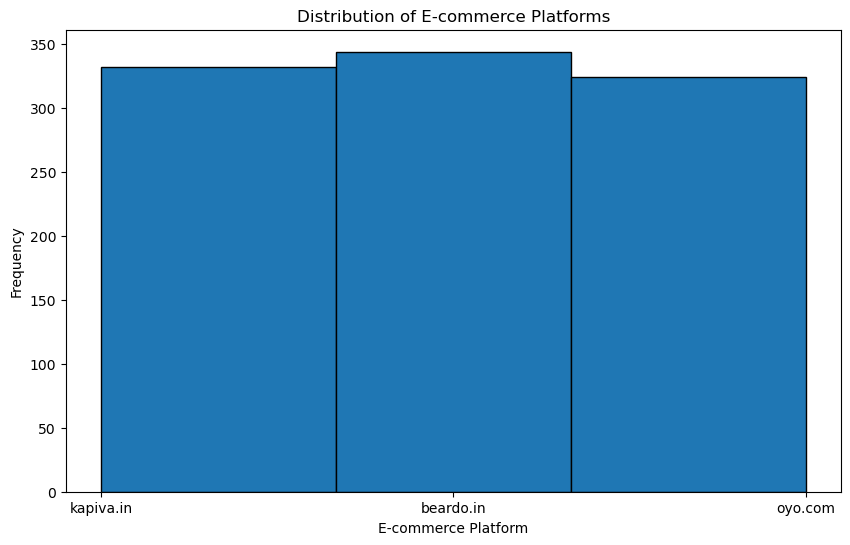

In [5]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(usage_data['E-commerce_Platform'], bins=3, edgecolor='black')
plt.xlabel('E-commerce Platform')
plt.ylabel('Frequency')
plt.title('Distribution of E-commerce Platforms')
plt.show()

In [6]:
# Usage Analysis: Evaluate how the extension impacts user behavior on various e-commerce platforms.

# Calculate the total number of coupon applications by platform
platform_coupon_counts = usage_data.groupby('E-commerce_Platform')['Coupon_Applied'].apply(lambda x: (x != 'NO_COUPON').sum()).reset_index(name='Coupon_Applications')

# Calculate the conversion rate (successful transactions / coupon applications) by platform
conversion_rates = usage_data[usage_data['Coupon_Applied'] != 'NO_COUPON'].groupby('E-commerce_Platform')['Transaction_Outcome'].apply(lambda x: (x == 'SUCCESS').mean()).reset_index(name='Conversion_Rate')

# Merge the two dataframes to combine the analysis
platform_analysis = pd.merge(platform_coupon_counts, conversion_rates, on='E-commerce_Platform')

print(platform_analysis)

  E-commerce_Platform  Coupon_Applications  Conversion_Rate
0           beardo.in                  255         0.792157
1           kapiva.in                  248         0.818548
2             oyo.com                  235         0.804255


In [7]:
# Enhancement Suggestions: Propose data-driven enhancements to increase the extension's efficiency and user engagement.

# Calculate the average number of coupon applications per user
avg_coupon_applications = usage_data.groupby('User_ID')['Coupon_Applied'].apply(lambda x: (x != 'NO_COUPON').sum()).mean()

# Calculate the distribution of coupon usage across users
coupon_usage_distribution = usage_data[usage_data['Coupon_Applied'] != 'NO_COUPON'].groupby('User_ID')['Coupon_Applied'].count().value_counts()

# Print the average coupon applications per user and the distribution of coupon usage
print(f"Average Coupon Applications per User: {avg_coupon_applications}")
print("Coupon Usage Distribution:")
print(coupon_usage_distribution)

Average Coupon Applications per User: 7.454545454545454
Coupon Usage Distribution:
Coupon_Applied
7     18
9     13
6     12
8     12
5     12
10     9
11     7
4      6
3      4
12     4
14     1
2      1
Name: count, dtype: int64


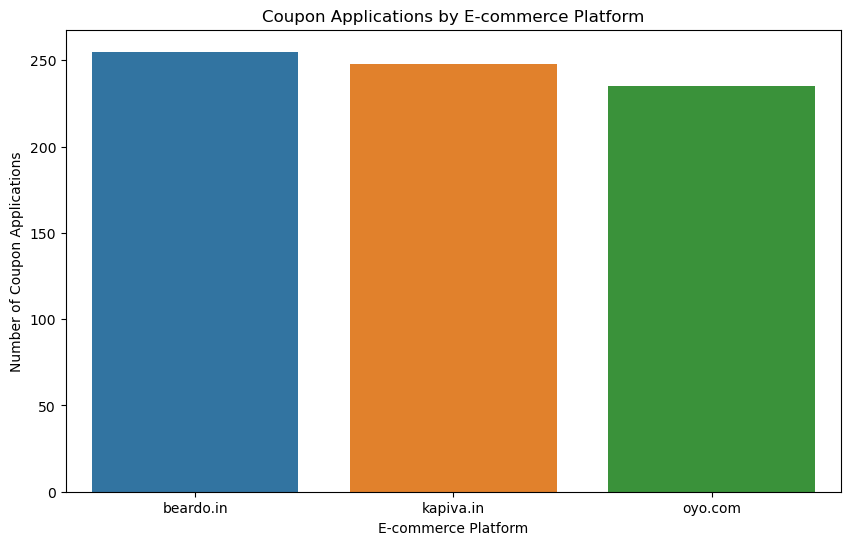

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5328\2003182410.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_transactions['Time_to_Success'] = (success_transactions.groupby('User_ID')['Timestamp'].diff()).dt.total_seconds() / 60


Average Coupon Application Success Rate: 80.49%
Average Time to Success (minutes): 6505.81


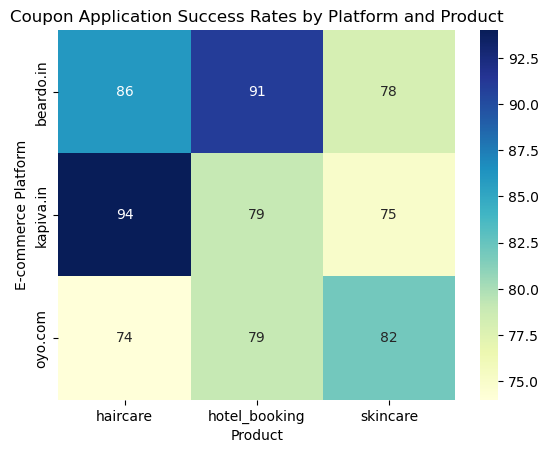

In [8]:
# Import necessary libraries
import seaborn as sns

# Calculate average coupon application success rate
avg_success_rate = usage_data[usage_data['Coupon_Applied'] != 'NO_COUPON']['Transaction_Outcome'].value_counts(normalize=True)['SUCCESS']

# Visualize coupon application success rate by platform
plt.figure(figsize=(10, 6))
sns.barplot(x='E-commerce_Platform', y='Coupon_Applications', data=platform_analysis)
plt.title('Coupon Applications by E-commerce Platform')
plt.xlabel('E-commerce Platform')
plt.ylabel('Number of Coupon Applications')
plt.show()

# Calculate average time taken from coupon application to successful transaction
success_transactions = usage_data[usage_data['Transaction_Outcome'] == 'SUCCESS']
success_transactions['Time_to_Success'] = (success_transactions.groupby('User_ID')['Timestamp'].diff()).dt.total_seconds() / 60
avg_time_to_success = success_transactions['Time_to_Success'].mean()

print(f"Average Coupon Application Success Rate: {avg_success_rate:.2%}")
print(f"Average Time to Success (minutes): {avg_time_to_success:.2f}")

# Generate heatmap of coupon application success rates by platform and product
heatmap_data = usage_data[usage_data['Coupon_Applied'] != 'NO_COUPON'].pivot_table(index='E-commerce_Platform', columns='Product', values='Transaction_Outcome', aggfunc='count', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Coupon Application Success Rates by Platform and Product')
plt.xlabel('Product')
plt.ylabel('E-commerce Platform')
plt.show()

Average Time Spent on E-commerce Platforms Before Coupon Application (minutes):
E-commerce_Platform
beardo.in    235.275591
kapiva.in    241.214575
oyo.com      255.384615
Name: Timestamp, dtype: float64
Correlation between Hours Spent and Coupon Count: 0.07


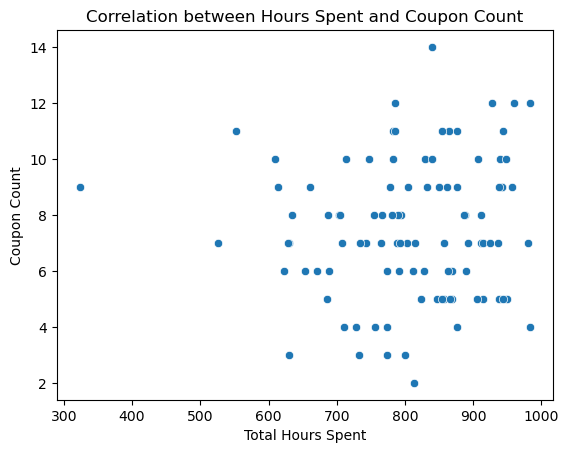

In [9]:
# Analyze user behavior to identify potential enhancements

# Calculate the average time spent on e-commerce platforms before coupon application
time_spent_before_coupon = usage_data[usage_data['Coupon_Applied'] != 'NO_COUPON'].groupby('E-commerce_Platform')['Timestamp'].apply(lambda x: (x - x.shift()).dt.total_seconds().mean() / 60)

print("Average Time Spent on E-commerce Platforms Before Coupon Application (minutes):")
print(time_spent_before_coupon)

# Analyze user engagement patterns and propose personalized coupon recommendations
user_engagement = usage_data.groupby('User_ID')['Timestamp'].apply(lambda x: (x - x.shift()).dt.total_seconds().sum() / 3600).reset_index(name='Total_Hours_Spent')
user_engagement['Coupon_Count'] = usage_data.groupby('User_ID')['Coupon_Applied'].apply(lambda x: (x != 'NO_COUPON').sum())

# Calculate correlation between hours spent and coupon count
correlation = user_engagement['Total_Hours_Spent'].corr(user_engagement['Coupon_Count'])

print(f"Correlation between Hours Spent and Coupon Count: {correlation:.2f}")

# Visualize correlation between hours spent and coupon count
sns.scatterplot(x='Total_Hours_Spent', y='Coupon_Count', data=user_engagement)
plt.title('Correlation between Hours Spent and Coupon Count')
plt.xlabel('Total Hours Spent')
plt.ylabel('Coupon Count')
plt.show()
